# Logistic Regression

🎯 Up until now, you have been modeling a regression task. This time, you are going to be modeling a classification task, on the famous Titanic dataset.

👇 Load the `titanic.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [1]:
import pandas as pd

df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


```markdown
Variable    Definition      Key

survival    Survival        0 = No, 1 = Yes
pclass      Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
```

# 1. Model evaluation

👇 We want to predict whether a passenger survived (`Survived`) the Titanic disaster, according to the following features:

- The class in which she/he was travelling (`Pclass`)
- The number of siblings/spouses he had onboard (`SibSp`)
- The number of parents/children he had onboard (`Parch`)
- The fare he paid for the ticket (`Fare`)

❓How accurate would a `LogisticRegression` model be at such a task? Save the accuracy under variable name `accuracy`.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
X = df[['Pclass', 'SibSp','Parch','Fare']]
y = df['Survived']

model = LogisticRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)
#cv_results
accuracy = cv_results['test_score'].mean()


### ☑️ Check your code

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('accuracy',
                         accuracy = accuracy
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/lewagon/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/lewagon/code/nikkordalis/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_accuracy.py::TestAccuracy::test_accuracy PASSED               [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/accuracy.pickle

git commit -m 'Completed accuracy step'

git push origin master


# 2. In-depth diagnosis

❓We've evaluated the accuracy of the model at predicting, but we want to investigate its performance in more depth. Is the model overfitting? Underfitting? How many learning examples does it need to learn optimally on the given features?

In [39]:
# the y value has to be one number only not a list or dataframe

(891,)

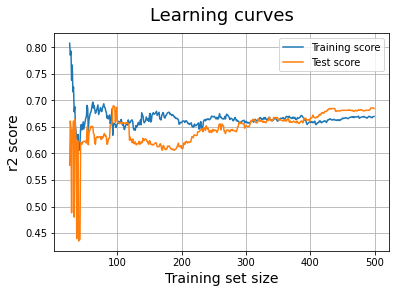

In [46]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# train_sizes = [25,50,75,100,150,300,400,550,700]
train_sizes = np.arange(2,500, 1)
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
plt.grid()


<details>
<summary> ℹ️ Once you have completed your diagnosis, unfold this cell </summary>   
    
<br/>
You should have plotted the learning curves.

👉 The curves should have converged:
- The model is not overfitting (no variance): it generalizes well.

👉 The test score stops increasing around 500 training observations:
- The model does not need more than 500 training observations to perform optimally on the given features.
    
</details>


# 3. Reduced training size

👇 Evaluate a model on the training size suggested by the curves. Are you able to maintain a similar accuracy? Save the new accuracy under variable name `reduced_training_accuracy`

In [56]:
df_c = pd.concat([X, y], axis=1)
df_c.sample(n=500, replace=True, random_state=1)

,Pclass,SibSp,Parch,Fare,Survived
37,3,0,0,8.0500,0
235,3,0,0,7.5500,0
72,2,0,0,73.5000,0
767,3,0,0,7.7500,0
715,3,0,0,7.6500,0
...,...,...,...,...,...
100,3,0,0,7.8958,0
343,2,0,0,13.0000,0
203,3,0,0,7.2250,0
703,3,0,0,7.7417,0


In [58]:
X = df_c[['Pclass', 'SibSp','Parch','Fare']]
y = df_c['Survived']

model = LogisticRegression()
# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)
#cv_results
reduced_training_accuracy = cv_results['test_score'].mean()
reduced_training_accuracy

0.6835791852363318

ℹ️ The accuracy should be nearly the same, with a reduced computational expense.

### ☑️ Check your code

In [59]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_accuracy',
                         accuracy = reduced_training_accuracy
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/lewagon/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/lewagon/code/nikkordalis/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_reduced_accuracy.py::TestReduced_accuracy::test_accuracy PASSED [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/reduced_accuracy.pickle

git commit -m 'Completed reduced_accuracy step'

git push origin master


# 4. Predictions

❓ Did the following person survive the Titanic disaster?

- Travelled in class 1 (`Pclass`)
- Had no spouse or siblings on board(`SibSp`)
- Had no parents or children on board (`Parch`)
- Paid 15 for his ticket (`Fare`)

⚠️ Make sure the model you use for predicting has the **least computational expense possible**. Save the prediction under variable name `prediction`.

In [92]:
test_scores = []
time_scores = []
for i in range(480,540,2):
    cv_results = cross_validate(model, X, y, cv=i)
    test_scores.append(cv_results['test_score'].mean())
    time_scores.append(cv_results["fit_time"].sum() + cv_results["score_time"].sum())

/home/lewagon/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 342 members, which is less than n_splits=480.
  warnings.warn(
/home/lewagon/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 342 members, which is less than n_splits=482.
  warnings.warn(
/home/lewagon/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 342 members, which is less than n_splits=484.
  warnings.warn(
/home/lewagon/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 342 members, which is less than n_splits=486.
  warnings.warn(
/home/lewagon/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site

In [93]:
len(time_scores)

30

In [94]:
len(test_scores)

30

In [96]:
l=range(480,540,2)
len(l)

30

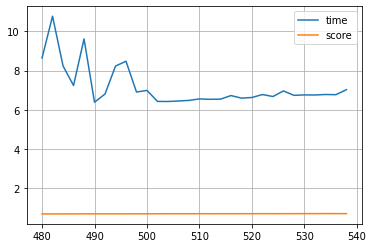

In [116]:

plt.plot(l, time_scores, label = "time")
plt.plot(l, test_scores, label = "score")
plt.legend()
plt.grid()

In [117]:
X

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500
...,...,...,...,...
886,2,0,0,13.0000
887,1,0,0,30.0000
888,3,1,2,23.4500
889,1,0,0,30.0000


In [118]:

prediction

model = model.fit(X, y)

In [119]:
prediction = model.predict([[1,0,0, 15]])
prediction 

/home/lewagon/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

❓ What is the probability that the person survived? Compute your answer and save it under variable name `probability`.


<details>
    <summary markdown='span'>💡 Hint</summary>

To return the predicted probabilities from a fitted sklearn Classifier, have a look at the method `.predict_proba()`
</details>

In [133]:
probability_all= model.predict_proba([[1,0,0, 15]])[0]

/home/lewagon/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [134]:
probability  = probability_all[1]

In [135]:
model.classes_

array([0, 1])

### ☑️ Check your code

In [136]:
from nbresult import ChallengeResult

result = ChallengeResult('predictions',
                         prediction = prediction,
                         probability = probability
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/lewagon/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/lewagon/code/nikkordalis/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-3.4.0
collecting ... collected 3 items

tests/test_predictions.py::TestPredictions::test_prediction_is_1 PASSED  [ 33%]
tests/test_predictions.py::TestPredictions::test_probability PASSED      [ 66%]
tests/test_predictions.py::TestPredictions::test_probability_type PASSED [100%]

============================== 3 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/predictions.pickle

git commit -m 'Completed predictions step'

git push origin master


# 5 Optional - Model Calibration
*Can you trust the predicted probabilities?* 🤔

- ❗️ Accuracy only evaluate your model performance based on the predicted **classes** 0s and 1s (obtained via`.predict()`)
- ❗️ High accuracy does not necessarily mean that predicted **probabilities** are "calibrated" (obtained via `.predict_probas()`)

What does "calibrated" probabilities mean? 
> _Among the samples to which your model gave a predict_proba value close to 0.9, approximately 90% actually belong to the positive class._

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/logistic-regression.png'>

❓ **Question 1**: Read more about [Calibration](https://scikit-learn.org/stable/modules/calibration.html) on sklearn docs

❓ **Question 2**: Try to implement `CalibrationDisplay` to check if you model is calibrated (on a holdout test set)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5)

# Fit a model on the train set


# Print calibration curve on the test set


❓ **Question 3**: Try to calibrate your model using `CalibratedClassifierCV`, and compute your new probability of survival. 

(Note that logistic regression are already generally well calibrated because they try to minimize the log-loss, refer to lecture https://kitt.lewagon.com/camps/YOUR_CAMP_NUMBER/lectures/content/04-Decision-Science_04-Logistic-Regression.slides.html?title=Logistic-Regression#/2/7/0)

In [ ]:
# YOUR CODE HERE

# 🏁